## Diseño y optimización de voladuras

Considerando parámetros como el diámetro de perforación, la longitud de carga explosiva y el espaciado de perforación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [6]:
# Datos de ejemplo
diametro_perforacion = [152, 165, 171, 178, 203]  # en milímetros
longitud_carga = [1.5, 1.8, 2.0, 2.2, 2.5]  # en metros
espaciado_perforacion = [1.5, 1.8, 2.0, 2.2, 2.5]  # en metros
factor_energia_datos = [0.9, 1.0, 1.2, 1.3, 1.4]

In [7]:
# Función objetivo para la optimización
def funcion_objetivo(x):
    diametro = x[0]
    longitud = x[1]
    espaciado = x[2]
    factor = x[3]
    
    energias = []
    for diam, long, espac, factor_energia in zip(diametro_perforacion, longitud_carga, espaciado_perforacion, factor_energia_datos):
        energia = calcular_energia_voladura(diam, long, espac, factor_energia, diametro, longitud, espaciado, factor)
        energias.append(energia)
    
    return sum(energias)

In [8]:
# Función para calcular la energía de voladura
def calcular_energia_voladura(diametro, longitud, espaciado, factor, diametro_opt, longitud_opt, espaciado_opt, factor_opt):
    area_seccion = np.pi * (diametro / 2) ** 2
    volumen_carga = area_seccion * longitud
    energia_voladura = volumen_carga * factor * (diametro_opt / diametro) * (longitud_opt / longitud) * (espaciado_opt / espaciado) * factor_opt
    return energia_voladura

In [9]:
# Realizar la optimización
x0 = [180, 2.0, 2.0, 1.0]  # Valores iniciales para la optimización
bounds = [(100, 250), (1.0, 3.0), (1.0, 3.0), (0.8, 1.5)]  # Límites para los parámetros
result = minimize(funcion_objetivo, x0, bounds=bounds)

In [10]:
# Obtener los valores óptimos de los parámetros
diametro_opt, longitud_opt, espaciado_opt, factor_opt = result.x

In [11]:
# Calcular la energía de voladura para cada combinación de parámetros
energias = []
for diam, long, espac in zip(diametro_perforacion, longitud_carga, espaciado_perforacion):
    energia = calcular_energia_voladura(diam, long, espac, factor_energia_datos[0], diametro_opt, longitud_opt, espaciado_opt, factor_opt)
    energias.append(energia)

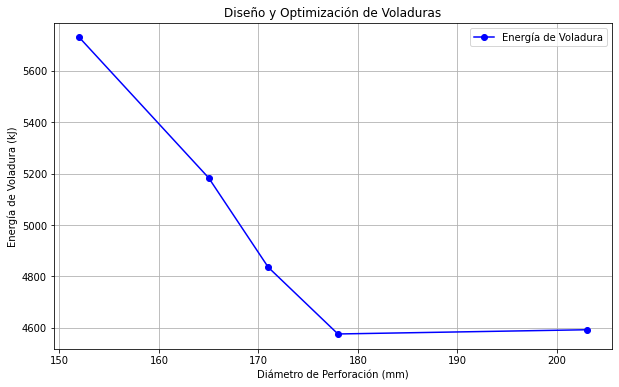

In [12]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(diametro_perforacion, energias, 'bo-', label='Energía de Voladura')
plt.xlabel('Diámetro de Perforación (mm)')
plt.ylabel('Energía de Voladura (kJ)')
plt.title('Diseño y Optimización de Voladuras')
plt.grid(True)
plt.legend()
plt.show()